In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [7]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [10]:
# view columns in 'measurement'

inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# view columns in 'station

inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
recent_date =(session.query(Measurement.date)
             .order_by(Measurement.date.desc())
                .first())
recent_date

('2017-08-23',)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
end_date= dt.date(2017, 8, 23)-dt.timedelta(days=365)
print (end_date)
print (recent_date)

2016-08-23
('2017-08-23',)


In [16]:
# Starting from the most recent data point in the database
# Calculate the date one year from the last date in data set.
start_date = dt.date(2017,8,23)-dt.timedelta(days=365)
print(start_date)


2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).order_by(Measurement.date).all()

In [18]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])
print (df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
3     2016-08-23            NaN
4     2016-08-23           0.02
...          ...            ...
2225  2017-08-22           0.50
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [19]:
# Clean dataframe of precipitation that is NaN
clean_df = df.dropna()
print (clean_df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-23           0.15
2     2016-08-23           0.05
4     2016-08-23           0.02
5     2016-08-23           1.79
...          ...            ...
2225  2017-08-22           0.50
2226  2017-08-23           0.00
2227  2017-08-23           0.00
2228  2017-08-23           0.08
2229  2017-08-23           0.45

[2021 rows x 2 columns]


In [20]:
# Sort the dataframe by date
clean_df.set_index(clean_df['date'], inplace = True)
clean_df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.02
2016-08-23,2016-08-23,1.79


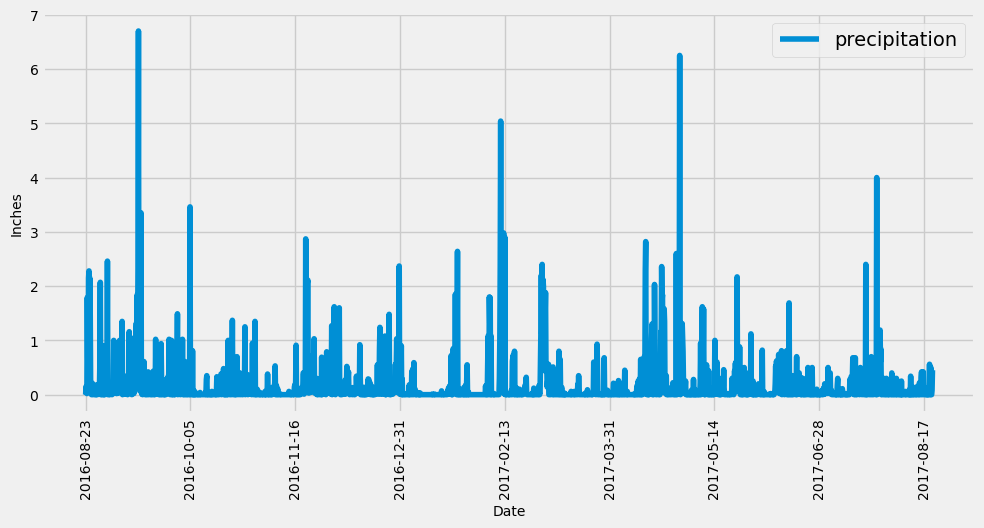

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
clean_df.plot(figsize=(10,5))
plt.tight_layout()
plt.xlabel ("Date", size = 10)
plt.xticks(rotation=90, size = 10)
plt.ylabel("Inches", size = 10)
plt.yticks(size = 10)
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_temp = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
    .filter(Measurement.date>=start_date).all()


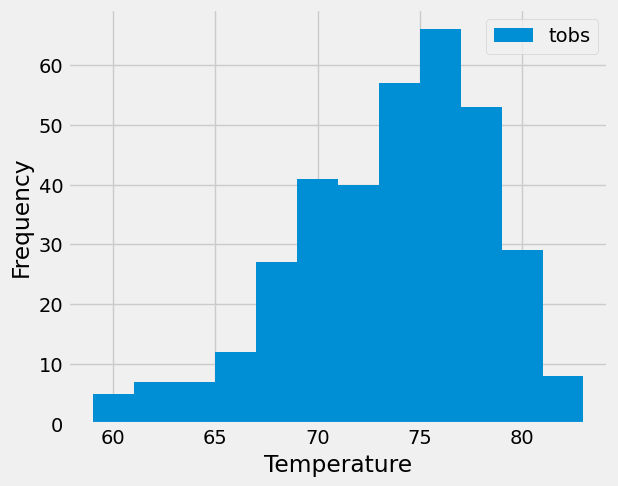

In [37]:
# plot the results as a histogram
USC00519281=pd.DataFrame(year_temp,columns=['tobs'])
USC00519281.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [38]:
# Close Session
session.close()